In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

C:\Users\dbg138\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
ncaa_games = pd.read_csv('../football_data/ncaa2017.csv')

In [4]:
ncaa_games.head()

,Home,Road,line,vscore,hscore,week,actual
0,Colorado St.,Oregon St.,4.0,27,58,1,31
1,Massachusetts,Hawaii,3.0,38,35,1,-3
2,San Jose St.,South Florida,-21.0,42,22,1,-20
3,Stanford,Rice,30.5,7,62,1,55
4,Alabama,Florida St.,7.5,7,24,2,17


In [5]:
ncaa_games['spread_diff'] = ncaa_games.actual - ncaa_games.line

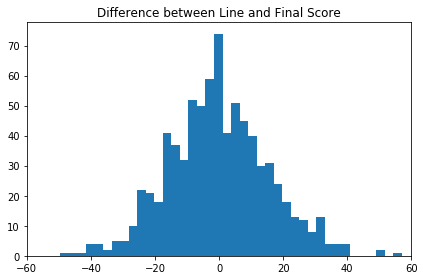

Mean: -0.18
Standard Deviation: 15.71


In [6]:
plt.hist(ncaa_games.spread_diff, bins=40)
plt.title('Difference between Line and Final Score')
plt.xlim([-60, 60])
plt.tight_layout()
plt.show()
print('Mean: %.2f' % np.mean(ncaa_games.spread_diff))
print('Standard Deviation: %.2f' %  np.std(ncaa_games.spread_diff, ddof=1))

In [7]:
ncaa_games[abs(ncaa_games.spread_diff)>50][
    ['Home','Road','line','hscore','vscore']]

,Home,Road,line,hscore,vscore
319,California,Washington St.,-16.5,37,3
497,Iowa,Ohio St.,-20.0,55,24
617,Georgia Southern,South Alabama,-5.0,52,0


In [8]:
ncaa_games['Home_Win'] = ncaa_games.hscore > ncaa_games.vscore

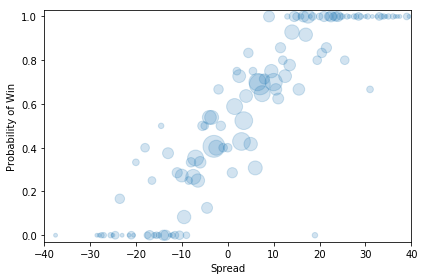

In [9]:
by_line = ncaa_games[['Home_Win', 'line']].groupby(
    ['line']).agg(['mean', 'count'])['Home_Win']
plt.scatter(x=by_line.index, 
            y = by_line['mean'], 
            s = by_line['count']*15, 
            alpha = .2)
plt.xlim([-40, 40])
plt.ylim([-.03, 1.03])
plt.xlabel('Spread')
plt.ylabel('Probability of Win')
plt.tight_layout()
plt.show()

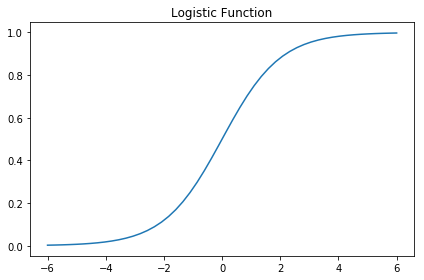

In [10]:
def logistic_function(x):
    return 1/(1+np.exp(-x))

x=np.linspace(-6,6)
y=logistic_function(x)

plt.plot(x,y)
plt.title('Logistic Function')
plt.tight_layout()
plt.show()

In [11]:
X = pd.DataFrame(data={'intercept': 1, 'line': ncaa_games.line})
y = ncaa_games.Home_Win

In [12]:
blr = sm.Logit(y,X)

In [13]:
results = blr.fit()
results.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.503733
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
intercept,-0.0754,0.090,-0.840,0.401,-0.252,0.101
line,0.1199,0.009,12.922,0.000,0.102,0.138


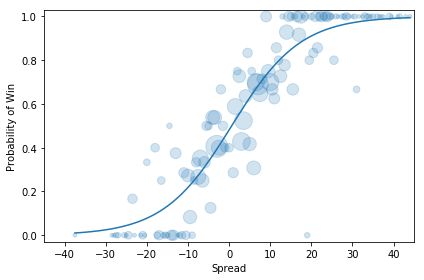

In [14]:
pred_x =pd.DataFrame(data=
                     {'intercept': 1, 
                      'line': np.linspace(X.line.min(),
                                          X.line.max(), 
                                          100)})
pred_y = results.predict(pred_x)
plt.scatter(x=by_line.index, 
            y = by_line['mean'], 
            s = by_line['count']*15, 
            alpha = .2)
plt.xlim([-45, 45])
plt.ylim([-.03, 1.03])
plt.xlabel('Spread')
plt.ylabel('Probability of Win')
plt.plot(pred_x.line, pred_y)
plt.tight_layout()
plt.show()

In [15]:
def compute_win_proba(spread, model):
    return model.predict([1,spread])[0]

print('Win Probability when team is favored by 6 points:\n%.2f' % 
      compute_win_proba(6, results))

Win Probability when team is favored by 6 points:
0.66


In [16]:
coefs = -.0754, .1199
def predict(line, constant, coef):
    return 1/(1+np.exp(-(constant + coef*line)))

In [17]:
predict(6, coefs[0], coefs[1])

0.65565710549848433

In [18]:
ncaa_games[ncaa_games.line == 31]

,Home,Road,line,vscore,hscore,week,actual,spread_diff,Home_Win
118,Ohio St.,Army,31.0,7,38,4,31,0.0,True
287,Oklahoma,Iowa St.,31.0,38,31,7,-7,-38.0,False
584,Penn St.,Rutgers,31.0,6,35,12,29,-2.0,True


In [19]:
ncaa_games[ncaa_games.line == 19]

,Home,Road,line,vscore,hscore,week,actual,spread_diff,Home_Win
39,Texas,Maryland,19.0,51,41,2,-10,-29.0,False
339,Louisville,Boston College,19.0,45,42,8,-3,-22.0,False


In [20]:
test = ncaa_games[ncaa_games.line!=0]

In [21]:
test['line_result'] = test.line > 0

C:\Users\dbg138\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
larger_spread = ncaa_games[abs(ncaa_games.line) >= 15]

In [43]:
larger_spread['line_result'] = larger_spread.line > 0

C:\Users\dbg138\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
len(larger_spread[larger_spread.line_result==larger_spread.Home_Win])/len(larger_spread)

0.9282511210762332